<a href="https://colab.research.google.com/github/jaswanthBavi/batch1/blob/main/%20dl-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.4213 - val_loss: 0.2298
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2164 - val_loss: 0.1846
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1809 - val_loss: 0.1671
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1650 - val_loss: 0.1548
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1540 - val_loss: 0.1483
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1484 - val_loss: 0.1450
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1458 - val_loss: 0.1428
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1436 - val_loss: 0.1410
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1418 - val_loss: 0.1396
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1403 - val_loss: 0.1383
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/ste

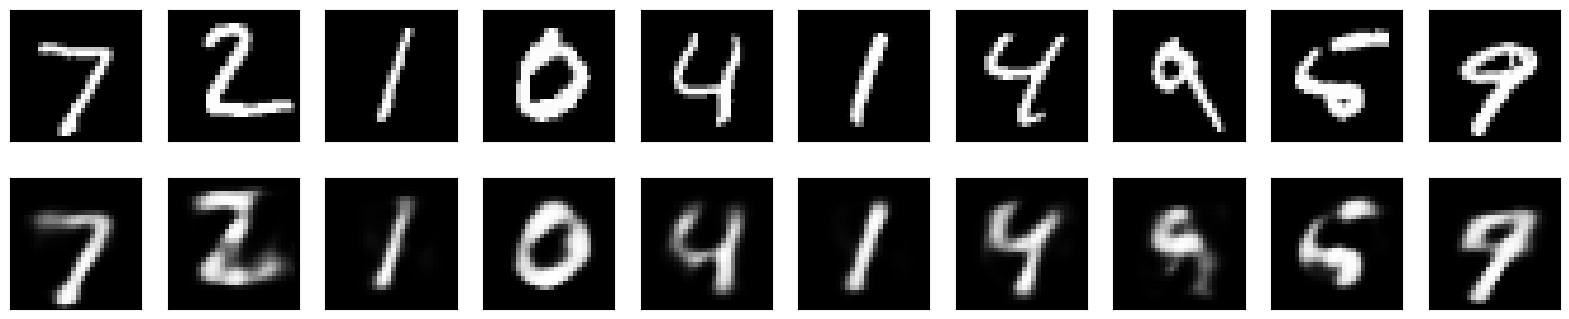

In [1]:
# Import all the necessary libraries
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoding dimension that determines how much the input will be compressed
encoding_dim = 15

# Input layer with shape of 784 (28x28 pixels, flattened)
input_img = Input(shape=(784,))

# Define the encoded representation of the input (compression layer)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoded representation (reconstruction layer)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model which takes the input image and returns the decoded image
autoencoder = Model(input_img, decoded)

# Create the encoder model which takes the input image and returns the encoded (compressed) representation
encoder = Model(input_img, encoded)

# Create the decoder model which takes the encoded input and returns the reconstructed image
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # Last layer of the autoencoder is the decoder layer
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model with the Adam optimizer and binary crossentropy loss function
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data by scaling it to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images (28x28) into vectors of size 784 (28*28)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print the shapes of the training and testing sets
print(x_train.shape)
print(x_test.shape)

# Train the autoencoder model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode some test data
encoded_imgs = encoder.predict(x_test)

# Decode the encoded data
decoded_imgs = decoder.predict(encoded_imgs)

# Display some of the original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
